In [ ]:
'''
San Francisco Metrosu BART projesi - Burada hangi istasyondan en fazla yolcu
taşındığını ve günün hangi saatinde yolculuk yaparsanız bir koltukta
oturarak yolculuk yapabileceğinizi hesaplayacaksınız. ve aşağıdaki
sorulara cevap vereceksiniz


Data Analytics Questions
Which BART station is the busiest?
What is the least popular BART route?
When is the best time to go to SF from Berkeley if you want to find a seat?
Which day of the week is the busiest?
How many people take the BART late at night?

Data Science Questions
Question A: Compute the straight line distance between every station
Question B: Build a model that can predict the number of people commuting to work by Bart between any 2 stations:
How would you approach that?
What additional data would you need?
How would you want the city or Bart officials to use your data?

Data Preparation
Append the two ridership files for 2016 and 2017
Merge the station data file
Answer data analytics questions
'''

In [193]:
import pandas as pd

In [192]:
#df1 = pd.read_csv('ridership/date-hour-soo-dest-2011.csv', encoding="latin1")
#df2 = pd.read_csv('ridership/date-hour-soo-dest-2012.csv', encoding="latin1")
#df3 = pd.read_csv('ridership/date-hour-soo-dest-2013.csv', encoding="latin1")
#df4 = pd.read_csv('ridership/date-hour-soo-dest-2014.csv', encoding="latin1")
#df5 = pd.read_csv('ridership/date-hour-soo-dest-2015.csv', encoding="latin1")
df6 = pd.read_csv('ridership/date-hour-soo-dest-2016.csv', encoding="latin1")
df7 = pd.read_csv('ridership/date-hour-soo-dest-2017.csv', encoding="latin1")
#df8 = pd.read_csv('ridership/date-hour-soo-dest-2018.csv', encoding="latin1")
#df9 = pd.read_csv('ridership/date-hour-soo-dest-2019.csv', encoding="latin1")
#df10 = pd.read_csv('ridership/date-hour-soo-dest-2020.csv', encoding="latin1")
#df11 = pd.read_csv('ridership/date-hour-soo-dest-2021.csv', encoding="latin1")
#df12 = pd.read_csv('ridership/date-hour-soo-dest-2022.csv', encoding="latin1")
#df13 =  pd.read_csv('ridership/date-hour-soo-dest-2023.csv', encoding="latin1")

In [194]:
#frames = [df1, df2, df3,df4, df5, df6,df7, df8, df9,df10,df11,df12,df13]
frames = [ df6,df7]

df = pd.concat(frames,ignore_index=True)

In [4]:
df.shape

(19947757, 5)

In [5]:
df.head()

,Date,Hour,Origin Station,Destination Station,Trip Count
0,2016-01-01,0,12TH,12TH,1
1,2016-01-01,0,12TH,16TH,1
2,2016-01-01,0,12TH,24TH,4
3,2016-01-01,0,12TH,ASHB,4
4,2016-01-01,0,12TH,BALB,2


In [6]:
df.tail()

,Date,Hour,Origin Station,Destination Station,Trip Count
19947752,2018-01-01,2,WOAK,POWL,3
19947753,2018-01-01,2,WOAK,RICH,1
19947754,2018-01-01,2,WOAK,SBRN,1
19947755,2018-01-01,2,WOAK,SHAY,2
19947756,2018-01-01,2,WOAK,WOAK,2


## DATA ANALITICS QUESTIONS

### Which BART station is the busiest?
To find the busiest BART station, we set a simple graph where nodes $v$ are stations, and weighted edges are subway route components. Edges can be  in inward $e_{i}$ or outward $e_{o}$ direction. Graph can be constrcuted simply by finding outward and inward edges for each node $v$ using data frame's origin and destination stations. Weight of the edge, $w$ is thus the trip count. The node with highest weighted degree represents busiest station, where weighted degree: 

Weighted Degree = $\sum_{i}^{\forall} \{ w_{i} \text{ of  edge } e_{i} \}$




In [7]:
len( df['Origin Station'].unique() )

46

In [8]:
len( df['Destination Station'].unique() )

46

In [9]:
# we observed that unique number of origin and destinations are the same. Next, we 
# check whether these two sets are identical.

In [10]:
# we make sure that origin and destination stations have identical unique set.
df_in = pd.DataFrame()
df_o = pd.DataFrame()


df_in['station'] = df['Destination Station'].unique() ;
df_o['station'] = df['Origin Station'].unique();  

df_o['station'].equals(df_in['station'])

for st in df_in['station'] :
    if df_o['station'].eq(st).any() == False :
        print(st)
for st in df_o['station'] :
    if df_in['station'].eq(st).any() == False :
        print(st)        

df_s = pd.DataFrame()
df_s['station'] = df_in['station']

In [11]:
df_s['inward_weight'] = ""
df_s['outward_weight'] = ""

#inward weights
for st in df_s['station'] :
    df_st = df[df['Destination Station']== st]
    total_weight = df_st['Trip Count'].sum()
    #print(total_weight)
    ind = df_s[df_s['station'] == st].index
    df_s['inward_weight'].iloc[ind] = total_weight 

#outward weights
for st in df_s['station'] :
    df_st = df[df['Origin Station']== st]
    total_weight = df_st['Trip Count'].sum()
    #print(total_weight)
    ind = df_s[df_s['station'] == st].index
    df_s['outward_weight'].iloc[ind] = total_weight    

In [12]:
# finding total weight of node by summing weights of inward and outward edges
df_s['node_weight'] = df_s['inward_weight'] + df_s['outward_weight']
df_s['node_weight'].astype(int)
df_s['node_weight'] = pd.to_numeric(df_s['node_weight'])
df_s

,station,inward_weight,outward_weight,node_weight
0,12TH,7953102,7842906,15796008
1,16TH,7916285,7899649,15815934
2,24TH,7765654,7999308,15764962
3,ASHB,3246001,3364016,6610017
4,BALB,6255802,6980958,13236760
5,BAYF,3504058,3536372,7040430
6,CIVC,13909579,15014601,28924180
7,CONC,3583688,3600811,7184499
8,DBRK,8102988,7711329,15814317
9,DELN,5262577,5075070,10337647


In [13]:
# finding node of highest weight
df_s['station'].iloc[ df_s['node_weight'].idxmax()]

'EMBR'

## What is the least popular BART route?
there are 46 stations, and from each station there exist a unique route to other 
destinations including self loops, the graph is fully connected graph. 
Considering self-loops  (i.e., trains origin and destination station is same) 
there are 2116 routes. First we find the weight of each route, and then minimum weight route.

In [14]:

for st in df_s['station'] :
    print ( len (df[df['Origin Station']== '12TH' ]['Destination Station'].unique()) )

46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46


In [27]:
from joblib import Parallel, delayed

Route_data = {}

stations = [];

for st_o in df_s['station'] :
    for st_d in df_s['station']:
        route_name = str(st_o)+" "+str(st_d)
        stations.append(route_name)

def calculate(station_name, df):
    str_split = station_name.split(" ")
    route_data = {}
    df_trip = df[(df['Origin Station'] == str_split[0]) & (df['Destination Station'] == str_split[1])]
    route_weight = df_trip['Trip Count'].sum()
    route_data[station_name] = route_weight  # Add route data to the dictionary
    Route_data.update(route_data)
    return Route_data

Route_data = Parallel(n_jobs=-1)(delayed(calculate)(station_name, df) for station_name in stations)


In [28]:
Route_data

[{'12TH 12TH': 27865},
 {'12TH 16TH': 193527},
 {'12TH 24TH': 170715},
 {'12TH ASHB': 156710},
 {'12TH BALB': 85111},
 {'12TH BAYF': 184328},
 {'12TH CIVC': 455085},
 {'12TH CONC': 187229},
 {'12TH DBRK': 351148},
 {'12TH DELN': 338018},
 {'12TH DUBL': 119298},
 {'12TH EMBR': 936312},
 {'12TH FTVL': 143862},
 {'12TH LAFY': 84563},
 {'12TH LAKE': 30193},
 {'12TH MCAR': 145718},
 {'12TH MONT': 684515},
 {'12TH NBRK': 138337},
 {'12TH ORIN': 69054},
 {'12TH PHIL': 201736},
 {'12TH PITT': 191088},
 {'12TH PLZA': 188388},
 {'12TH POWL': 528587},
 {'12TH ROCK': 112129},
 {'12TH SANL': 199188},
 {'12TH SBRN': 47641},
 {'12TH SHAY': 87772},
 {'12TH WCRK': 171280},
 {'12TH WOAK': 68012},
 {'12TH 19TH': 39235},
 {'12TH COLM': 67996},
 {'12TH COLS': 200485},
 {'12TH DALY': 104896},
 {'12TH GLEN': 93824},
 {'12TH MLBR': 81515},
 {'12TH NCON': 88392},
 {'12TH RICH': 109025},
 {'12TH SSAN': 46373},
 {'12TH UCTY': 116167},
 {'12TH WDUB': 62434},
 {'12TH CAST': 58222},
 {'12TH HAYW': 156880},
 {'12TH 

In [30]:
df_r = pd.DataFrame(columns=['Route Name', 'Route Weight'])
for item in Route_data : 
    for key in item:
        df_r = df_r.append({'Route Name': key, 'Route Weight': item[key]}, ignore_index=True)

C:\Users\haluk\AppData\Local\Temp\ipykernel_11024\2792584153.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_r = df_r.append({'Route Name': key, 'Route Weight': item[key]}, ignore_index=True)
C:\Users\haluk\AppData\Local\Temp\ipykernel_11024\2792584153.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_r = df_r.append({'Route Name': key, 'Route Weight': item[key]}, ignore_index=True)
C:\Users\haluk\AppData\Local\Temp\ipykernel_11024\2792584153.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_r = df_r.append({'Route Name': key, 'Route Weight': item[key]}, ignore_index=True)
C:\Users\haluk\AppData\Local\Temp\ipykernel_11024\2792584153.py:4: FutureWarning: The frame.append method is deprecated and will be remo

C:\Users\haluk\AppData\Local\Temp\ipykernel_11024\2792584153.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_r = df_r.append({'Route Name': key, 'Route Weight': item[key]}, ignore_index=True)
C:\Users\haluk\AppData\Local\Temp\ipykernel_11024\2792584153.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_r = df_r.append({'Route Name': key, 'Route Weight': item[key]}, ignore_index=True)
C:\Users\haluk\AppData\Local\Temp\ipykernel_11024\2792584153.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_r = df_r.append({'Route Name': key, 'Route Weight': item[key]}, ignore_index=True)
C:\Users\haluk\AppData\Local\Temp\ipykernel_11024\2792584153.py:4: FutureWarning: The frame.append method is deprecated and will be remo

C:\Users\haluk\AppData\Local\Temp\ipykernel_11024\2792584153.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_r = df_r.append({'Route Name': key, 'Route Weight': item[key]}, ignore_index=True)
C:\Users\haluk\AppData\Local\Temp\ipykernel_11024\2792584153.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_r = df_r.append({'Route Name': key, 'Route Weight': item[key]}, ignore_index=True)
C:\Users\haluk\AppData\Local\Temp\ipykernel_11024\2792584153.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_r = df_r.append({'Route Name': key, 'Route Weight': item[key]}, ignore_index=True)
C:\Users\haluk\AppData\Local\Temp\ipykernel_11024\2792584153.py:4: FutureWarning: The frame.append method is deprecated and will be remo

C:\Users\haluk\AppData\Local\Temp\ipykernel_11024\2792584153.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_r = df_r.append({'Route Name': key, 'Route Weight': item[key]}, ignore_index=True)
C:\Users\haluk\AppData\Local\Temp\ipykernel_11024\2792584153.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_r = df_r.append({'Route Name': key, 'Route Weight': item[key]}, ignore_index=True)
C:\Users\haluk\AppData\Local\Temp\ipykernel_11024\2792584153.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_r = df_r.append({'Route Name': key, 'Route Weight': item[key]}, ignore_index=True)
C:\Users\haluk\AppData\Local\Temp\ipykernel_11024\2792584153.py:4: FutureWarning: The frame.append method is deprecated and will be remo

C:\Users\haluk\AppData\Local\Temp\ipykernel_11024\2792584153.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_r = df_r.append({'Route Name': key, 'Route Weight': item[key]}, ignore_index=True)
C:\Users\haluk\AppData\Local\Temp\ipykernel_11024\2792584153.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_r = df_r.append({'Route Name': key, 'Route Weight': item[key]}, ignore_index=True)
C:\Users\haluk\AppData\Local\Temp\ipykernel_11024\2792584153.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_r = df_r.append({'Route Name': key, 'Route Weight': item[key]}, ignore_index=True)
C:\Users\haluk\AppData\Local\Temp\ipykernel_11024\2792584153.py:4: FutureWarning: The frame.append method is deprecated and will be remo

C:\Users\haluk\AppData\Local\Temp\ipykernel_11024\2792584153.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_r = df_r.append({'Route Name': key, 'Route Weight': item[key]}, ignore_index=True)
C:\Users\haluk\AppData\Local\Temp\ipykernel_11024\2792584153.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_r = df_r.append({'Route Name': key, 'Route Weight': item[key]}, ignore_index=True)
C:\Users\haluk\AppData\Local\Temp\ipykernel_11024\2792584153.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_r = df_r.append({'Route Name': key, 'Route Weight': item[key]}, ignore_index=True)
C:\Users\haluk\AppData\Local\Temp\ipykernel_11024\2792584153.py:4: FutureWarning: The frame.append method is deprecated and will be remo

C:\Users\haluk\AppData\Local\Temp\ipykernel_11024\2792584153.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_r = df_r.append({'Route Name': key, 'Route Weight': item[key]}, ignore_index=True)
C:\Users\haluk\AppData\Local\Temp\ipykernel_11024\2792584153.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_r = df_r.append({'Route Name': key, 'Route Weight': item[key]}, ignore_index=True)
C:\Users\haluk\AppData\Local\Temp\ipykernel_11024\2792584153.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_r = df_r.append({'Route Name': key, 'Route Weight': item[key]}, ignore_index=True)
C:\Users\haluk\AppData\Local\Temp\ipykernel_11024\2792584153.py:4: FutureWarning: The frame.append method is deprecated and will be remo

C:\Users\haluk\AppData\Local\Temp\ipykernel_11024\2792584153.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_r = df_r.append({'Route Name': key, 'Route Weight': item[key]}, ignore_index=True)
C:\Users\haluk\AppData\Local\Temp\ipykernel_11024\2792584153.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_r = df_r.append({'Route Name': key, 'Route Weight': item[key]}, ignore_index=True)
C:\Users\haluk\AppData\Local\Temp\ipykernel_11024\2792584153.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_r = df_r.append({'Route Name': key, 'Route Weight': item[key]}, ignore_index=True)
C:\Users\haluk\AppData\Local\Temp\ipykernel_11024\2792584153.py:4: FutureWarning: The frame.append method is deprecated and will be remo

In [31]:
df_r

,Route Name,Route Weight
0,12TH 12TH,27865
1,12TH 16TH,193527
2,12TH 24TH,170715
3,12TH ASHB,156710
4,12TH BALB,85111
...,...,...
2111,WARM HAYW,15125
2112,WARM SFIA,3231
2113,WARM FRMT,12095
2114,WARM OAKL,2670


In [32]:
df_r['Route Weight']= df_r['Route Weight'].astype(int)

In [33]:
# route with minimum weight (having minimum total trips)
df_r['Route Name'].iloc[ df_r['Route Weight'].idxmin()]

'WARM MLBR'

## When is the best time to go to SF from Berkeley if you want to find a seat?
There is no passenger information. Normally, it is expected that at night time trains have empty seats. However, I assumed that is more likely that one can find empty seat when number of trips in a route are maximum. As of origin, we consider 12th St. Mission (SF)*, abbreviated as 12TH in our data . And destination of route is Downtown Berkeley  abbreviated as DBRK in our data.

(*)https://www.bart.gov/sites/default/files/docs/abbreviations.pdf

In [40]:
df_trip = df[(df['Origin Station'] == '12TH') & (df['Destination Station'] == 'DBRK')]
df_trip.reset_index(drop=True, inplace=True)

In [41]:

df_trip['Hour'].iloc[ df_trip['Trip Count'].idxmax()]

14

## Which day of the week is the busiest?

In [42]:
# Convert the 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date']) 
# Create a new column 'DayOfWeek' with the day of the week (0=Monday, 6=Sunday)
df['day'] =  df['Date'].dt.dayofweek

In [44]:
df['day'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 19947757 entries, 0 to 19947756
Series name: day
Non-Null Count     Dtype
--------------     -----
19947757 non-null  int64
dtypes: int64(1)
memory usage: 152.2 MB


In [62]:
grouped_day = df.groupby('day').sum()

C:\Users\haluk\AppData\Local\Temp\ipykernel_11024\1950380500.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grouped_day = df.groupby('day').sum()


Text(0, 0.5, 'Trip Count')

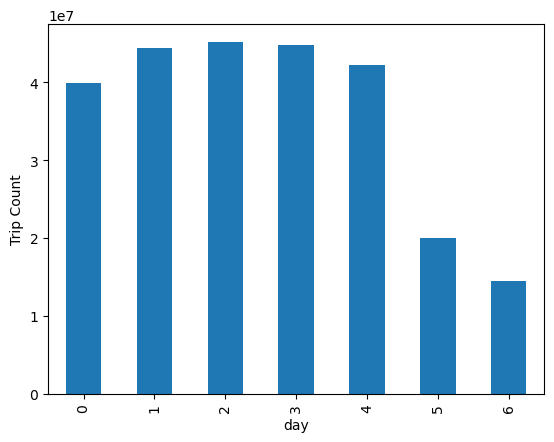

In [68]:
# Busiest day is the third day (2) on graph, Wednesday
ax =grouped_day['Trip Count'].plot.bar()
ax.set_ylabel('Trip Count')

## How many people take the BART late at night?

In [58]:
# we group accoring to 'hour', and find sum of road trips 
grouped = df.groupby('Hour').sum()

C:\Users\haluk\AppData\Local\Temp\ipykernel_11024\204914585.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grouped = df.groupby('Hour').sum()


Text(0, 0.5, 'Trip Count')

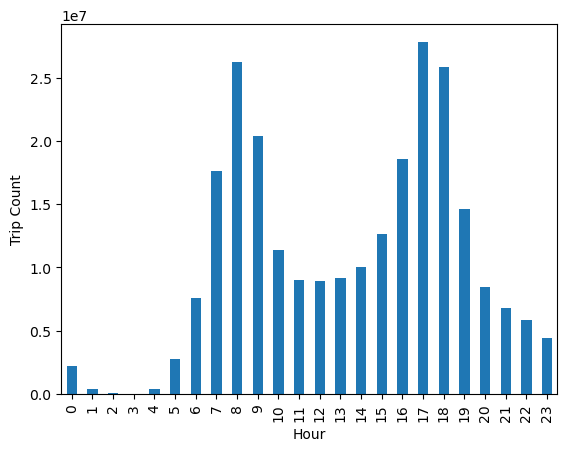

In [70]:
# we observe that at night number of trips are significantly lower compared to the other times.
grouped.max()
ax = grouped['Trip Count'].plot.bar()
ax.set_ylabel('Trip Count')

<Axes: xlabel='Hour'>

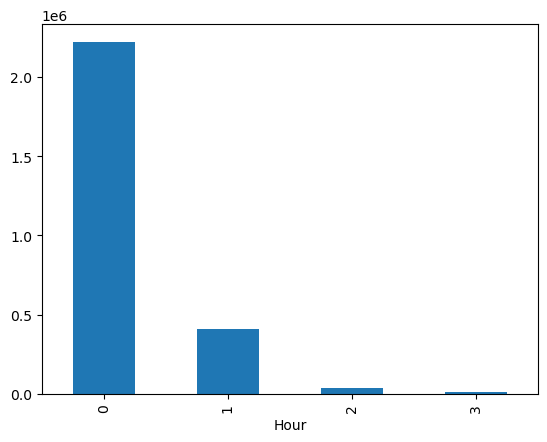

In [79]:
grouped['Trip Count'][0:4].plot.bar()

In [81]:
sum(grouped['Trip Count'][0:4])

2681591

## DATA SCIENCE QUESTIONS

In [84]:
station_info = pd.read_csv('station_info.csv')

In [85]:
station_info

,Abbreviation,Description,Location,Name
0,12TH,"1245 Broadway, Oakland CA 94612<br />12th St. ...","-122.271450,37.803768,0",12th St. Oakland City Center (12TH)
1,16TH,"2000 Mission Street, San Francisco CA 94110<br...","-122.419694,37.765062,0",16th St. Mission (16TH)
2,19TH,"1900 Broadway, Oakland CA 94612<br />19th Stre...","-122.268602,37.808350,0",19th St. Oakland (19TH)
3,24TH,"2800 Mission Street, San Francisco CA 94110<br...","-122.418143,37.752470,0",24th St. Mission (24TH)
4,ASHB,"3100 Adeline Street, Berkeley CA 94703<br />As...","-122.270062,37.852803,0",Ashby (ASHB)
5,BALB,"401 Geneva Avenue, San Francisco CA 94112<br /...","-122.447506,37.721585,0",Balboa Park (BALB)
6,BAYF,"15242 Hesperian Blvd., San Leandro CA 94578<br...","-122.126514,37.696924,0",Bay Fair (BAYF)
7,CAST,"3301 Norbridge Dr., Castro Valley CA 94546<br ...","-122.075602,37.690746,0",Castro Valley (CAST)
8,CIVC,"1150 Market Street, San Francisco CA 94102<br ...","-122.414123,37.779732,0",Civic Center/UN Plaza (CIVC)
9,COLS,"7200 San Leandro St., Oakland CA 94621<br />We...","-122.196869,37.753661,0",Coliseum/Oakland Airport (COLS)


,Route Name,Route Weight
0,12TH 12TH,27865
1,12TH 16TH,193527
2,12TH 24TH,170715
3,12TH ASHB,156710
4,12TH BALB,85111
...,...,...
2111,WARM HAYW,15125
2112,WARM SFIA,3231
2113,WARM FRMT,12095
2114,WARM OAKL,2670


In [108]:

import math

def haversine_distance(lat1, lon1, lat2, lon2):
    # I obtained the haversine_distance function from chatGPT
    # Radius of the Earth in kilometers
    R = 6371.0
    
    # Convert latitude and longitude from degrees to radians
    lat1, lon1, lat2, lon2 = map(math.radians, [lat1, lon1, lat2, lon2])
    
    # Differences between latitudes and longitudes
    dlat = lat2 - lat1
    dlon = lon2 - lon1
    
    # Haversine formula
    a = math.sin(dlat / 2) ** 2 + math.cos(lat1) * math.cos(lat2) * math.sin(dlon / 2) ** 2
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))
    
    # Calculate distance in kilometers
    distance = R * c
    return distance

# Define the column names
columns = ['loc1', 'loc2', 'Distance[km]']

# Create an empty DataFrame with the defined columns
df_loc = pd.DataFrame(columns=columns)
i = 0;
for loc1 in station_info['Location'] :
    loc = loc1.split(',')
    lat1 = loc[0]
    lat1 = lat1.replace('-','')
    lat1 = -float(lat1)
    long1 = float(loc[1])
    
    for loc2 in station_info['Location'] :
        loc = loc2.split(',')
        lat2 = loc[0]
        lat2 = lat2.replace('-','')
        lat2 = -float(lat2)
        long2 = float(loc[1])
        dist = haversine_distance(lat1, long1, lat2, long2)
        row_ = [loc1, loc2, dist]
        df_loc.loc[i] = row_;
        i = i+1;
     

In [110]:
df_loc

,loc1,loc2,Distance[km]
0,"-122.271450,37.803768,0","-122.271450,37.803768,0",0.000000
1,"-122.271450,37.803768,0","-122.419694,37.765062,0",16.644038
2,"-122.271450,37.803768,0","-122.268602,37.808350,0",0.417475
3,"-122.271450,37.803768,0","-122.418143,37.752470,0",16.594540
4,"-122.271450,37.803768,0","-122.270062,37.852803,0",2.915261
...,...,...,...
2111,"-122.295140,37.804872,0","-122.017388,37.590630,0",33.385874
2112,"-122.295140,37.804872,0","-121.939313,37.502171,0",43.424600
2113,"-122.295140,37.804872,0","-122.067527,37.905522,0",26.001852
2114,"-122.295140,37.804872,0","-121.928240,37.699756,0",41.267809


In [178]:
df_s = df.sample(50000)
x,y=df_s.drop("Trip Count",axis=1),df_s[["Trip Count"]]


In [179]:
x.drop('Date',axis=1,inplace=True)


In [180]:
x= pd.get_dummies(x,drop_first=True)

In [181]:
y.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50000 entries, 1322364 to 853385
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Trip Count  50000 non-null  int64
dtypes: int64(1)
memory usage: 781.2 KB


In [182]:
def fnc_all_regression_models(x,y):
    
    from sklearn.linear_model import LinearRegression
    from sklearn.linear_model import Ridge,Lasso
    from sklearn.linear_model import ElasticNet
    from sklearn.tree import ExtraTreeRegressor
    from sklearn.ensemble import GradientBoostingRegressor
    from sklearn.neighbors import KNeighborsRegressor
    
    from sklearn.model_selection import train_test_split

    from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error
    
    
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.4,random_state=42)

    L=LinearRegression()
    R=Ridge()
    Lass=Lasso()
    E=ElasticNet()
    ExTree=ExtraTreeRegressor()
    GBR=GradientBoostingRegressor()
    KN=KNeighborsRegressor()
    
    algos=[L,R,Lass,E,ExTree,GBR,KN]
    algo_names=['LinearRegression','Ridge','Lasso','ElasticNet','ExtraTreeRegressor','GradientBoostingRegressor','KNeighborsRegressor']
    r_squared=[]
    rmse=[]
    mae=[]
    
    result=pd.DataFrame(columns=['R_Squared','RMSE','MAE'],index=algo_names)
    
    for item in algos:
        item.fit(x_train,y_train)
        item.predict(x_test)
        r_squared.append(r2_score(y_test,item.predict(x_test)))
        rmse.append((mean_squared_error(y_test,item.predict(x_test)))**.5)
        mae.append(mean_absolute_error(y_test,item.predict(x_test)))
        
    result.R_Squared=r_squared
    result.RMSE=rmse
    result.MAE=mae
        
    return result.sort_values('R_Squared',ascending=False)

In [183]:
fnc_all_regression_models(x,y)

C:\ProgramData\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,R_Squared,RMSE,MAE
ExtraTreeRegressor,0.499944,22.737676,7.976575
KNeighborsRegressor,0.445381,23.946059,9.838040
GradientBoostingRegressor,0.431871,24.235954,9.431402
LinearRegression,0.154290,29.569741,11.773832
Ridge,0.154258,29.570292,11.768469
ElasticNet,0.007845,32.027749,13.681431
Lasso,0.004212,32.086346,13.730699


In [195]:
!pip install pycaret

Defaulting to user installation because normal site-packages is not writeable
     -------------------------------------- 484.4/484.4 kB 2.0 MB/s eta 0:00:00
     -------------------------------------- 302.2/302.2 kB 3.7 MB/s eta 0:00:00
     ---------------------------------------- 73.4/73.4 kB ? eta 0:00:00
     -------------------------------------- 569.7/569.7 kB 3.3 MB/s eta 0:00:00
     ---------------------------------------- 81.8/81.8 kB 4.5 MB/s eta 0:00:00
     -------------------------------------- 153.4/153.4 kB 4.5 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     ---------------------------------------- 17.5/17.5 MB 5.7 MB/s eta 0:00:00
     ---------------------------------------- 1.3/1.3 MB 5.6 MB/s eta 0:00:00
     ---------------------------------------- 65.9/65.9 MB 4.7 MB/s eta 0:00:00
     ---------------------------------------- 44.0/44.0 kB 2.1 MB/s eta 0:00:00
     ------------------------

In [200]:
from pycaret.regression import*


In [199]:
s = setup(df,target = 'Trip Count')

,Description,Value
0,Session id,2869
1,Target,Trip Count
2,Target type,Regression
3,Original data shape,"(19947757, 5)"
4,Transformed data shape,"(19947757, 5)"
5,Transformed train set shape,"(13963429, 5)"
6,Transformed test set shape,"(5984328, 5)"
7,Numeric features,1
8,Categorical features,3
9,Preprocess,True


In [198]:
best_model = compare_models()

Processing:   0%|          | 0/81 [00:00<?, ?it/s]

[]